# Visualizations in Python

Authors: Mattias Dürrmeier([email](mailto:mattias.duerrmeier@unifr.ch)) and Thomas Dürrmeier([email](mailto:thomas.duerrmeier@edu.hefr.ch)).


This notebook shows some visualization examples using Matplotlib, Seaborn, and Pandas.

We begin with two plots with only Numpy and Matplotlib pyplot interface, to show the resemblance with Matlab.
We then show how Seaborn, a high-level API built on top of Matplotlib, can be used instead of or in combination with Matplotlib.
Seaborn takes advantage of Pandas DataFrame. Pandas is a library to load and manipulate tabular data.
Finally, we present one example that combines Matplotlib Axes interface (object-based) to manipulate the figure and axes and Seaborn to plot the tabular data.

# Matplotlib: Basic Plots

In [1]:
import numpy as np # linear algebra package
import matplotlib.pyplot as plt

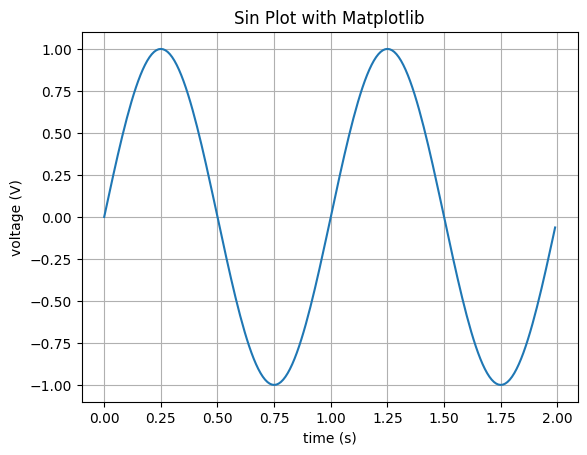

In [2]:
x = np.arange(0.0, 2.0, step=0.01) # 'step=' is optional
y = np.sin(2 * np.pi * x)

plt.plot(x, y)

plt.title("Sin Plot with Matplotlib")
plt.xlabel("time (s)")
plt.ylabel("voltage (V)")
plt.grid()

plt.show()

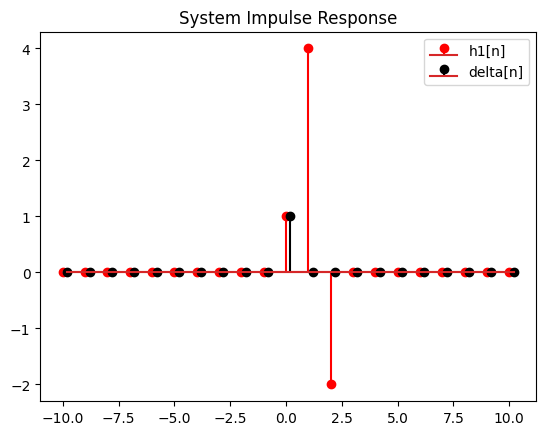

In [3]:
def system1(x):
    y = np.zeros(len(x))
    
    for i in range(len(y)):
        if i == 0:
            y[i] = x[i]
        elif i == 1:
            y[i] = x[i] + 4  * x[i - 1]
        else:
            y[i] = x[i] + 4  * x[i - 1] - 2 * x[i - 2]
        
    return y


n = np.linspace(-10, 10, num=21)

delta = np.zeros(len(n))

for i in range(len(n)):
    if n[i] == 0:
        delta[i] = 1

h1 = system1(delta)

plt.stem(n, h1, "r")
plt.stem(n + 0.2, delta, "k")

plt.legend(["h1[n]", "delta[n]"])
plt.title("System Impulse Response")

plt.show()

# Plots with Tabular Data

We use the [penguins](https://allisonhorst.github.io/palmerpenguins/) dataset for the next few plots.
We can import it directly from Seaborn. This library has a few toy datasets to play with.

Alternatively, we could load the data directly using Pandas.
For a CSV file, this would be done using `pd.load_csv("data.csv")`.

Seaborn is used in combination with Pandas DataFrame.
We showcase how some more complex plots can be done with one Seaborn API call.

In [4]:
import pandas as pd # data processing, CSV I/O
import seaborn as sns # high-level interface based on matplotlib

# with seaborn, we can easily change the theme of the plots
# this affect matplotlib and seaborn plots!
# there are mutliple styles to choose from
sns.set_theme(style="darkgrid")

In [5]:
df = sns.load_dataset("penguins")

df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [6]:
df["bill_length_mm"] # access a column of the DataFrame

0      39.1
1      39.5
2      40.3
3       NaN
4      36.7
       ... 
339     NaN
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 344, dtype: float64

## Barplot with Matplotlib

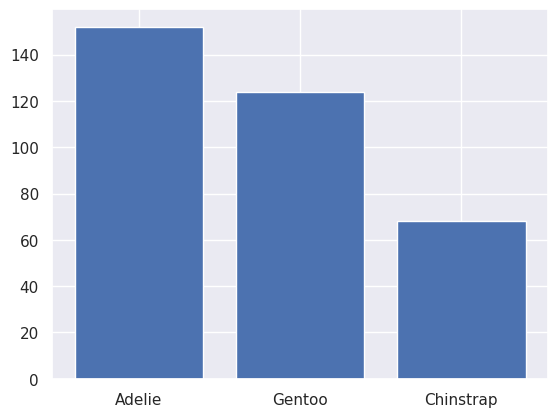

In [7]:
df_species = df["species"].value_counts()

species = df_species.index.tolist() # converting to a list is necessary because of the index type
counts = df_species.values

plt.bar(species, counts)
plt.show()

## Seaborn Equivalent

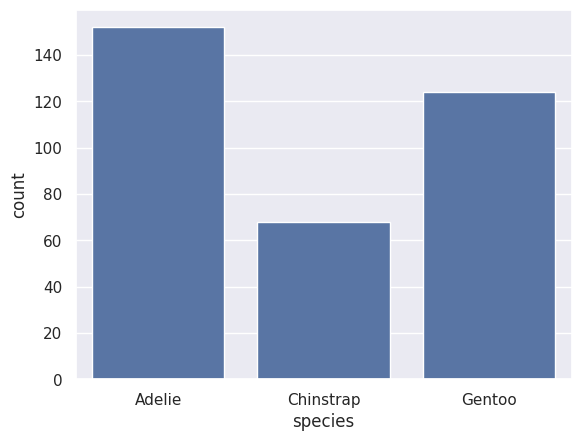

In [8]:
sns.countplot(data=df, x="species"); # the semi-colon is useful to supress the returned values

## Seaborn Pairwise Plot

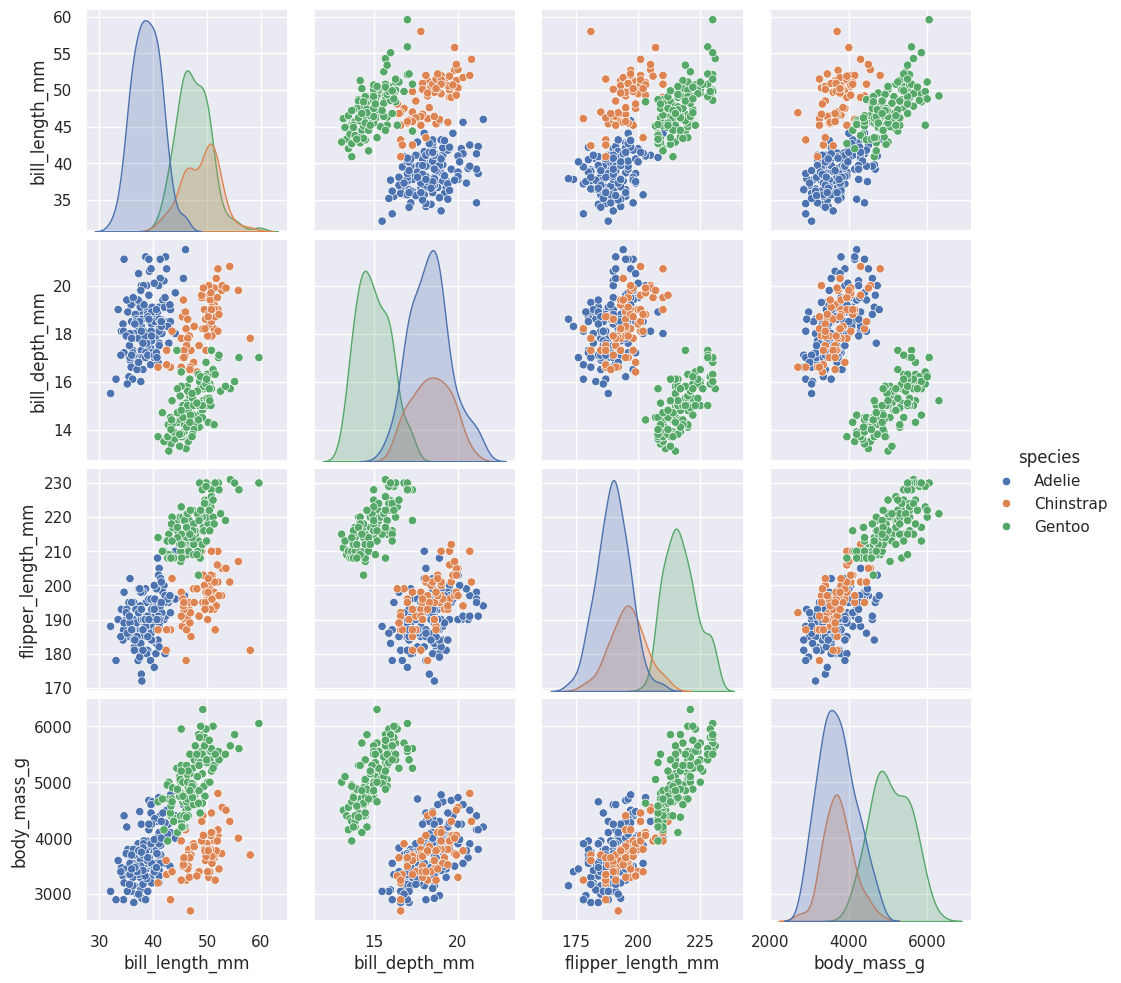

In [9]:
sns.pairplot(data=df, hue="species");

## Seaborn: Scatterplot with Regressions

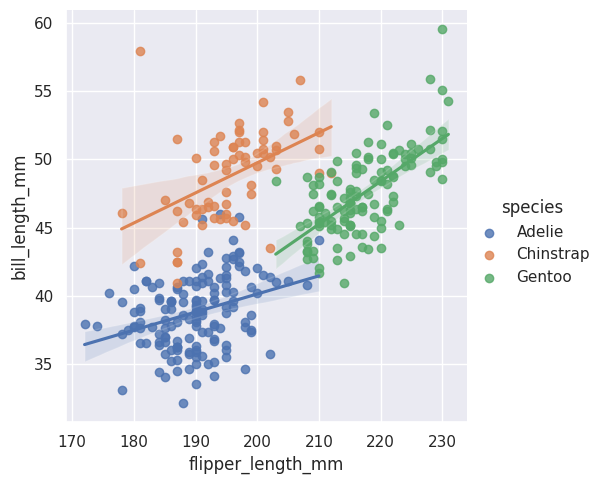

In [10]:
sns.lmplot(data=df, x="flipper_length_mm", y="bill_length_mm", hue="species");

# Complex Plot: Combining Pandas, Seaborn and Matplotlib

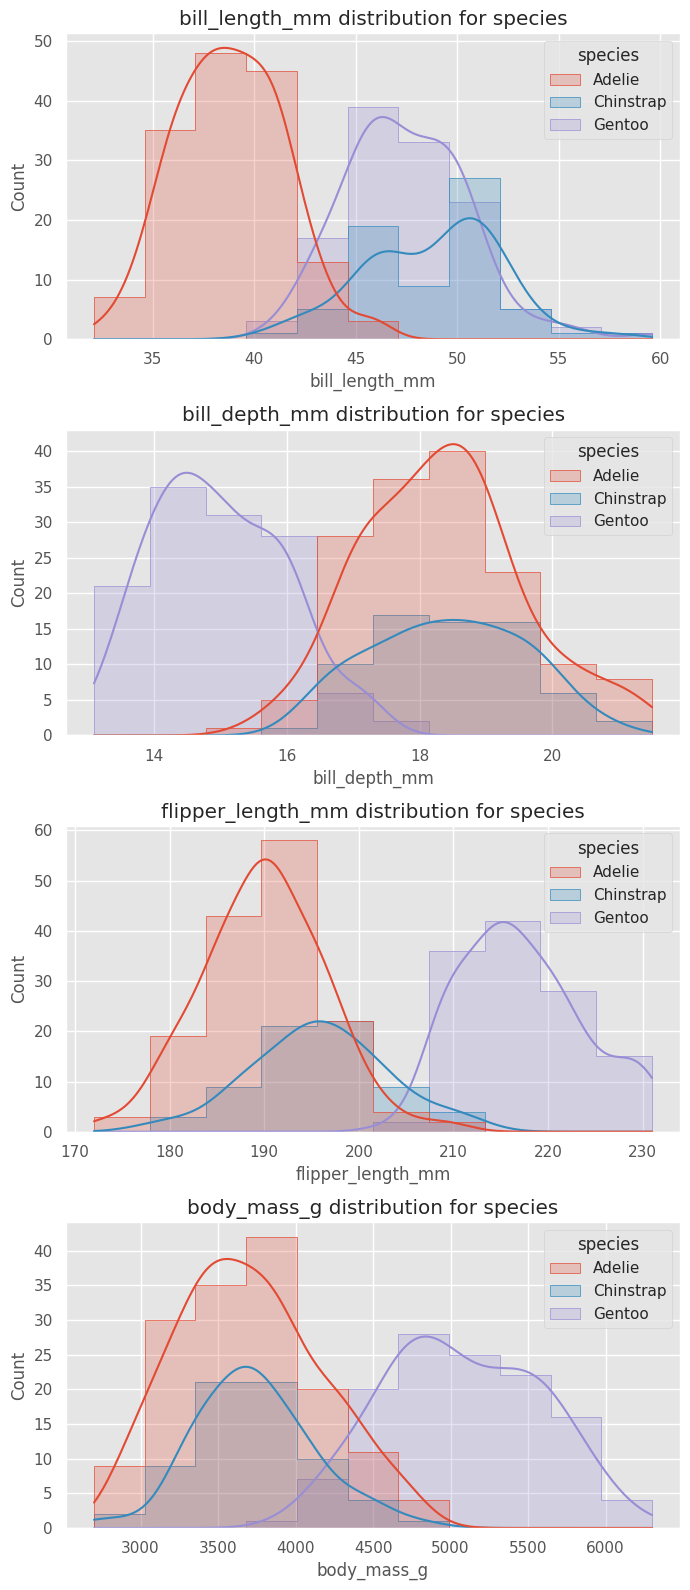

In [11]:
def num_features_target_plot(df: pd.DataFrame, features: list, target: str) -> None:
    nrows = len(features)
    fig, axs = plt.subplots(nrows=nrows, ncols=1, figsize=(7, nrows * 4), layout="tight")
    
    for idx, feat in enumerate(features):
        sns.histplot(data=df, x=feat, hue=target, kde=True, element="step", ax=axs[idx])
        axs[idx].set_title(f"{feat} distribution for {target}")
        
    plt.show()
        
# matplotlib also has built-in styles; here we use the one from ggplot
plt.style.use('ggplot')

num_features_target_plot(df, ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"], "species")

# Additional Resources

Matplotlib offers two interfaces: [Axes and pyplot](https://matplotlib.org/stable/api/index.html).
The pyplot interface is like the Matlab API.  
Axes is the object-oriented interface. We can manipulate every component in the figures through their respective object.

More examples for Matplotlib and Seaborn:
- https://matplotlib.org/stable/gallery/index.html
- https://seaborn.pydata.org/examples/index.html